In [3]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.finnhub.data import FinnhubData as finnhub
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [5]:
ticker = 'VST'

fh = finnhub()
data = fh.get_historical_data(ticker, fh.get_daily_closings, days = 180)

data.index = data['t']
data.sort_index()
data.drop_duplicates()

,t,o,l,h,c,v
t,,,,,,
2020-09-14 20:00:00,2020-09-14 20:00:00,18.87,18.87,18.87,18.87,259534
2020-09-15 20:00:00,2020-09-15 20:00:00,18.42,18.42,18.42,18.42,175817
2020-09-16 20:00:00,2020-09-16 20:00:00,18.61,18.61,18.61,18.61,688862
2020-09-17 20:00:00,2020-09-17 20:00:00,18.28,18.28,18.28,18.28,639394
2020-09-18 20:00:00,2020-09-18 20:00:00,18.11,18.11,18.11,18.11,766182
...,...,...,...,...,...,...
2021-03-05 21:00:00,2021-03-05 21:00:00,17.82,17.82,17.95,18.05,472837
2021-03-08 21:00:00,2021-03-08 21:00:00,18.81,18.88,18.81,18.88,437998
2021-03-09 21:00:00,2021-03-09 21:00:00,18.65,18.65,18.75,18.75,501581


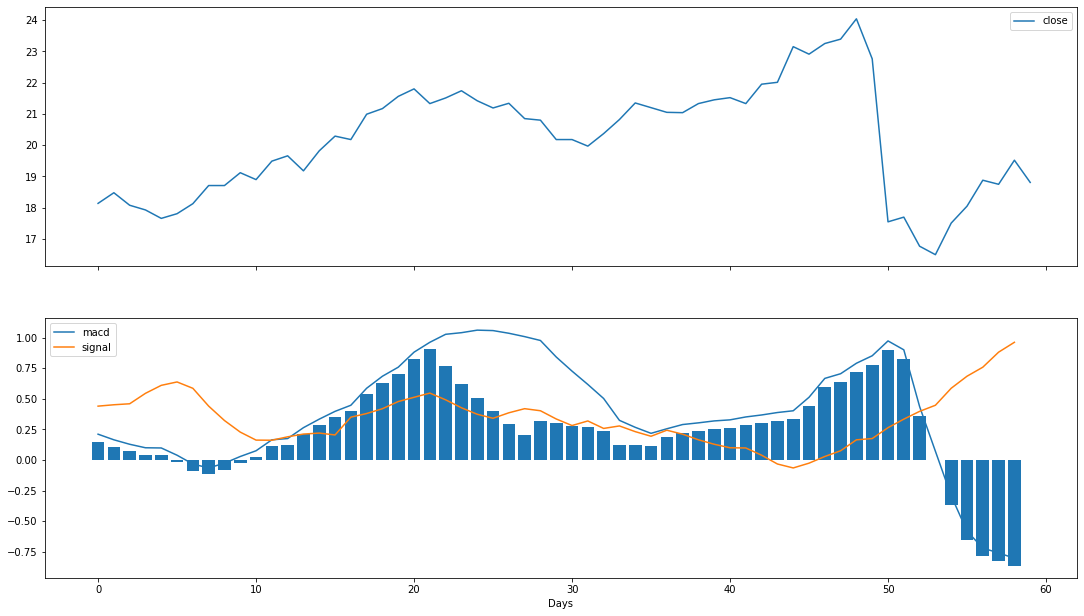

In [6]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

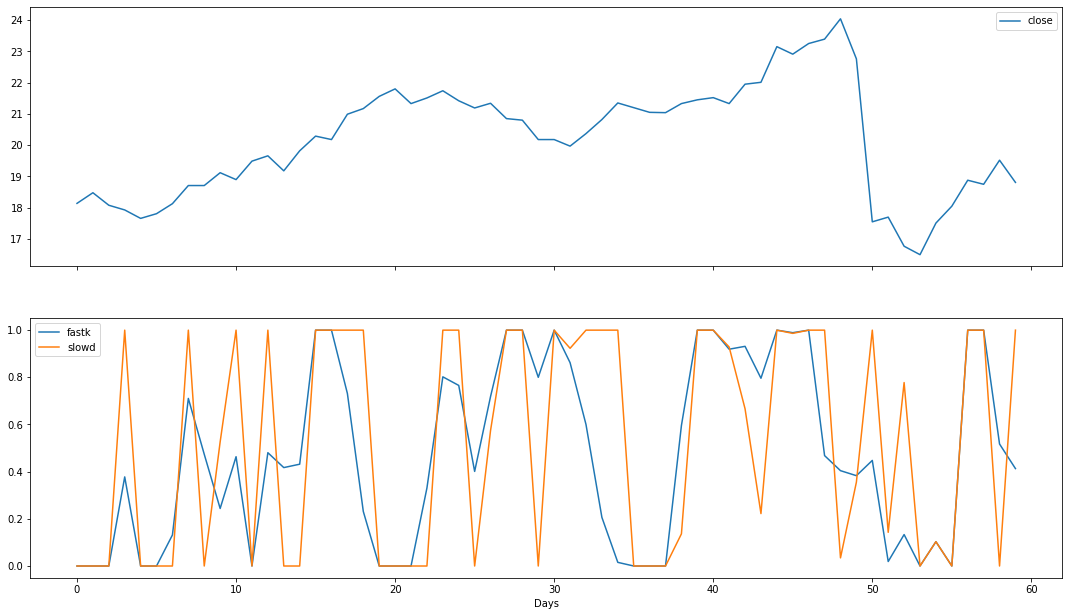

In [7]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)